# Reading and Understanding the Data 

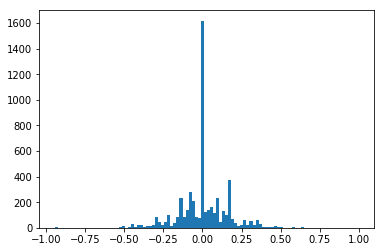

In [1]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import csv
import random
import os
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img_list = list()

data_dir = 'IMG'
path = '/CarND-Behavioral-Cloning-P3/'
data_csv = '~/CarND-Behavioral-Cloning-P3/driving_log.csv'

df = pd.read_csv(data_csv, header=None,
                names =['center','left', 'right', 'steering','throttle', 'brake'], index_col = False)
#df['direction'] = pd.Series('s', index=df.index)
steering = np.array(df.steering, dtype=np.float32)

#yes_no2 = os.path.isfile('driving_log.csv')

#print(yes_no2)

with open('driving_log.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        center = row[0].strip()
        left = row[1].strip()
        right = row[2].strip()
        steering = np.array(row[3], dtype=np.float32)
        throttle = np.array(row[4], dtype=np.float32)
        
        if steering == 0:
            if (np.random.rand() <= .35):
                img_list.append([center, left, right, steering, throttle])
        else:
            img_list.append([center, left, right, steering, throttle])

#print(img_list[3])

histo = [x[3] for x in img_list]

bins = 100
plt.hist(histo, bins=bins)
plt.show()






# Data Processing

In [2]:
def read_img_file(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #image = image/255.-.5
    return image

def brightness_image(image):
    image_hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    rnd_bright = 0.25+np.random.uniform()
    image_hsv[:,:,2] = image_hsv[:,:,2]*rnd_bright
    image_RGB = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
    return image_RGB

def img_size(image): 
    output_col = 128
    output_row = 60
    top_offset=.375 
    bottom_offset=.125
    top = int(top_offset * image.shape[0])
    bottom = int(bottom_offset * image.shape[0])
    image = cv2.resize(image[top:-bottom, :], (output_col, output_row),interpolation=cv2.INTER_AREA)
    return image

def flip_image(image, steering):
    if random.randint(0, 1):
        return cv2.flip(image, 1), -steering
    else:
        return image, steering
    
def shift_image(image, steering,shift_range):
    rows = image.shape[0]
    cols = image.shape[1]
    shift_x = shift_range*np.random.uniform()-shift_range/2
    steer_shift = steering + shift_x/shift_range*2*.2
    shift_y = 10*np.random.uniform()-10/2
    shift_dim = np.float32([[1,0,shift_x],[0,1,shift_y]])
    shift_img = cv2.warpAffine(image, shift_dim, (cols, rows))
    return shift_img, steer_shift 

def shift_practice(image, shift_range):
    rows = image.shape[0]
    cols = image.shape[1]
    shift_x = shift_range*np.random.uniform()-shift_range/2
    shift_y = 10*np.random.uniform()-10/2
    shift_dim = np.float32([[1,0,shift_x],[0,1,shift_y]])
    shift_img = cv2.warpAffine(image, shift_dim, (cols, rows))
    return shift_img 
    
def flip_practice_image(image):
    if random.randint(0, 1):
        return cv2.flip(image, 1)
    else:
        return image

In [ ]:
ind = 0
f_name_c = df['center'][ind][4:] 
f_name_l = df['left'][ind][5:]
f_name_r = df['right'][ind][5:]

#img_l = cv2.imread(os.path.join(data_dir,f_name_c))
#img_c = cv2.imread('IMG/center_2016_12_01_13_30_48_287.jpg')
#plt.figure(figsize=(16,8))
#plt.imshow(img_c)
#plt.show()
#yes_no1 = os.path.isfile('IMG/center_2016_12_01_13_30_48_287.jpg')
#yes_no2 = os.path.isfile('driving_log.csv')
#yes_no3 = os.path.isfile(os.path.join('IMG',f_name_c))
#print (yes_no1, yes_no2, yes_no3)

img_c = read_img_file(cv2.imread(os.path.join(data_dir, f_name_c)))
img_l = read_img_file(cv2.imread(os.path.join(data_dir, f_name_l)))
img_r = read_img_file(cv2.imread(os.path.join(data_dir, f_name_r)))
img_c = shift_practice(img_c,150)
img_c = brightness_image(img_c)
img_c = np.array(img_c)
img_c = img_size(img_c)
img_c = flip_practice_image(img_c)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_l)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_c)
plt.axis('off')
#plt.title('Steering Value: '+str(np.round(steering[ind])))
plt.subplot(1,3,3)
plt.imshow(img_r)
plt.axis('off')
plt.show()

#print (img_c.shape[0],img_c.shape[1])
print(f_name_c)

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Shuffle img_list
img_list = shuffle(img_list)

#Split test img set
train_set, valid_set = train_test_split(img_list, test_size=0.3, random_state=0)

print("Train set =", len(train_set))
print("Validation set =", len(valid_set))
#print(train_set)

Train set = 3642
Validation set = 1561


Insert description of preprocessing

# Generator

In [4]:
def load_data(input_data, indices):
    steer_aug = 0.1
    X = list()
    y = list()
    
    for i in indices:
        rnd = np.random.randint(0, 3)
        name = input_data[i][rnd][4:]
        image = cv2.imread(os.path.join(data_dir,name))
        y_steer = input_data[i][3]
        
        if rnd ==1:
            y_steer += steer_aug
        elif rnd ==2:
            y_steer -= steer_aug
            
        X.append(image)
        y.append(y_steer)
        
    return X, y

#X,y = load_data(train_set, int(50))
#plt.imshow(X[0])
#plt.show()

In [5]:
def generator(samples, batch):
        X_batch = []
        y_batch = []
        
        indicies = np.random.randint(0, len(samples), batch)
        
        X, y = load_data(samples, indicies)
        
        for i in range(batch):
            image = X[i]
            y_steer = y[i]
            #image = cv2.imread(os.path.join(data_dir,path))
            image = read_img_file(image)
            image,y_steer = shift_image(image,y_steer,150)
            image = brightness_image(image)
            #image = np.array(image)
            image,y_steer = flip_image(image, y_steer)
            image = img_size(image)

            X_batch.append(image)
            y_batch.append(y_steer)
            
        yield np.array(X_batch), np.array(y_batch)   

In [6]:
import tensorflow as tf
from keras import models, optimizers, backend
from keras.layers import Dense, Convolution2D, MaxPooling2D, Activation, Dropout, Flatten, Lambda
from keras.optimizers import Adam

img_row = 60
img_col = 128
img_ch = 3


model = models.Sequential()
model.add(Lambda(lambda x: x/127.5 - .5, input_shape=(img_row, img_col, img_ch),output_shape=(img_row, img_col, img_ch)))
model.add(Convolution2D(24, 5, 5, border_mode='same', input_shape=(img_row, img_col, img_ch), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(36, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(48, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

adam = Adam(lr=1e-04)
model.compile(optimizer=adam, loss='mse')

          
print(model.summary())

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 60, 128, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 60, 128, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 30, 64, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 30, 64, 36)    21636       maxpooling2d_1[0][0]             
___________________________________________________________________________________________


Using the ADAM optimizer with a learning rate of 1e-4
Because this is a continous regression problem we are using mean squared error and the loss function

In [7]:
from pathlib import Path
import json

def save_model(model_json, h5):
    json_string = model.to_json()
    with open(model_json, 'w' ) as f:
        json.dump(json_string, f)
    model.save(h5)
               
    print('Model Saved')

In [8]:
#validation_gen = gen_valid(df)
#validation_size = len(df)
sm_limit = 1 
batch = 50
sample_epoch_train= 20000
sample_epoch_valid= 2000
n_epoch = 10

i_best = 0 
val_best = 1000

for i in range(10): 
    fit = model.fit_generator(generator(train_set, batch), verbose =1,
                              samples_per_epoch=sample_epoch_train,
                              nb_epoch=n_epoch, 
                              validation_data=generator(valid_set, batch),
                              nb_val_samples=sample_epoch_valid)
    
    model_json = 'model_' + str(i) + '.json'
    h5 = 'model_' + str(i) + '.h5'
    save_model(model_json,h5)
    
    val_loss = history.history['val_loss'][0]
    if val_loss < val_best:
        i_best = i
        val_best = val_loss
        model_json = 'model_best.json'
        weights = 'model_best.h5'
        save_model(model_json,weights)
        
    sm_limit = 1/(i+1)
    
#print('Best model found at iteration # ' + str(i_best))
#print('Best Validation score : ' + str(np.round(val_best,4)))

Epoch 1/10


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py", line 429, in data_generator_task
    generator_output = next(self._generator)
StopIteration



ValueError: output of generator should be a tuple (x, y, sample_weight) or (x, y). Found: None